## Fundamentals of Data Analysis - Project ##

**Name: James McEneaney** <br/><br/>
**Course: Higher Diploma in Computing in Data Analytics, ATU Ireland** <br/><br/> 
**Semester: Semester 2 2023** <br/><br/>


***

### Introduction ###

This project sets out to analyse the data points and variables within Fisher's Iris Dataset. For each variable, the focus will be on the classifcation of the variable according to it's type as represented in Python code, utilising appropriate summary statistics to analyse the variable and displaying variables using the most appropriate plots.

I am using Visual Studio Code (VS Code) (version 1.85.1) to write my project and to upload it to my repository on GitHub for assessment. I am also using Jupyter code cells within VS Code.

This file will firstly give some background information to the dataset in question. 

I will then outline the steps which I needed to take before I could begin the actual analysis itself: downloading the dataset, preparing the dataset by adding the correct headings, and importing the modules, libraries and packages which I used to complete the project.

When generating different summary statistics I have typically calclated them for the dataset as a whole, and then for the individual varieties of Iris. I obtained summary statistics such as ranges, means, standard deviatations and skewness. From these, calculated figures for coefficients of variation. I also calculated the correlation coefficients for the six possible pairs of traits. 

I then carried out data visualisation on the Iris dataset, using histograms, scatterplots and boxplots. I also included code to predict values for an Iris trait given measurements of another trait of the same variety of Iris. 

My script saves each plot generated from the data as a .png file and saves these into the folder called 'project_images', found in the same repository as this file (these can also be viewed below, outputted from the code). I will discuss my interpretations of the various plots I have created.

My project will conclude with an overall summary of my findings and my thoughts upon conclusion of the project. I will also provide a list of references (using APA reference style) which I used to complete my work.


### Table of contents ###
* [Introduction](#introduction)
* [Background of dataset](#background-of-dataset)
* [Pre-analysis](#pre-analysis)
* [Variable types in dataset](#variable-types-in-dataset)
* [Statistical Analysis](#statistical-analysis)
    * [Summary statistics](#summary-statistics)
    * [Coefficient of Variation](#coefficienct-of-variation)
    * [Skewness](#skewness)
    * [Correlation coefficients](#correlation-coefficients)
* [Data Visualisation](#data-visualisation)
    * [Histograms](#histograms)
    * [Scatterplots](#scatterplots)
    * [Boxplots](#boxplots)
    * [Linear regression predictions](#linear-regression-predictions)
* [Summary](#summary)
* [References](#references)

### Background of dataset ###

The data set was collected in 1935 by the American botanist Edgar Anderson and used in 1936 by the British statistician and biologist Ronald A. Fisher. It relates to data collected from samples of three species of the Iris flowering plant genus: Iris setosa, Iris virginica, and Iris versicolor.

It is commonly used as an introductory data set by people who are learning how to analyse and visualise data using programming languages. It is also as a test case in machine learning.

Fifty samples were collected for each species, giving one hundred and fifty samples in total. 

For each sample, four features of the flower were measured; these were: sepal length, sepal width, petal length and petal width. These attributes of the samples are contained in columns 1, 2, 3 and 4 respectively within the dataset. The species name of the flower is also included in the dataset in column 5.

The petal of a flowering plant are the leaves of the flower which surround the reproductive parts of the flower, and which are often brightly coloured to attract pollinators. Sepals usually protect the flower when it is in a bud and structurally support the petals when the flower is in bloom.

The below is an image of the three flowers analysed in the dataset, along with a label for the sepal and petal of one of the three flower species (Iris Versicolor):

![image](https://www.embedded-robotics.com/wp-content/uploads/2022/01/Iris-Dataset-Classification.png)

### Pre-analysis ###

I downloaded the Iris dataset from https://archive.ics.uci.edu/ml/datasets/iris. I saved it as a .csv file into the folder where my I worked on my project. There were no headings for the data when I opened the dataset; however, the site which I downloaded the data from did provide the information about what each of the five columns in the dataset represents. I used this to add the headings to the data so I could manipulate it.

The headings for the five columns were given as below:
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
* Iris setosa
* Iris versicolour
* Iris virginica

To enable me to analyse the dataset, I will import some libraries and modules commonly used for this purpose:

In [182]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression 

These libraries are as follows:

* *Matplotlib* is a library used by Python to make plots and graphs. It requires NumPy to run. *Matplotlib.pyplot* is a collection functions which allows us to do different things to the plots we make, such as create them, add headings, change the colour scheme etc.

* *NumPy* (Numerical Python) is a package used in Python to carry out mathematical operations on numerical datatypes, such as integers and floating-point numbers. It creates multi-dimensional array objects which allow Python to carry out mathematical operations much more efficiently than would be the case in Python without NumPy. 

* *pandas* is built on top on NumPy and is a powerful and flexible Python package used for data analysis, especially of tabular data, such as the data in the .csv file used for this project. I used pandas to open the Iris dataset. Pandas creates data-structures which allow data to be manipulated, with the most important being 1-dimensional data 'series' and 2-dimensional 'DataFrames' (the structure which is used here to manipulate the Iris data). The DataFrame in pandas stores data as a two-dimensional structure where each piece of information has a row and column label.

* *Seaborn* is built on top of matplotlib. It enables us to make more appealing plots, utilising different styles.

* *Scikit Learn* is a machine learning library used, among other things, to carry out regression analysis on datasets. It is largely written in Python, and uses NumPy extensively for high-performance linear algebra and array operations.

Next, I will create a pandas DataFrame object to use in my analysis. I will do this by reading the .csv file with pandas and assigning names to each column, based on the information available on the website I downloaded the .csv file from:

In [183]:
df = pd.read_csv("data/iris.data.csv", names=['sepal length', 'sepal width', 'petal length', 'petal width', 'variety'])

We can get a sense of what information is contained within the dataset by printing out the first five and last five rows from it:

In [184]:
print(df)

     sepal length  sepal width  petal length  petal width         variety
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


It will also be useful to create sub-dataframes from the overall dataframe, filtered by each of the three Iris flowers:

In [185]:
df_setosa = df[df['variety'] == 'Iris-setosa']
df_versicolor = df[df['variety'] == 'Iris-versicolor']
df_virginica = df[df['variety'] == 'Iris-virginica']

### Variable types in data set ###

Fisher's Iris dataset consists of five variables: sepal length, sepal width, petal length, petal width and the variety of the Iris flower. To determine what "type" Python classifies each variable as, we can use the function df.dtypes:

In [186]:
print(df.dtypes)

sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
variety          object
dtype: object


We find that each of the numerical variables are classified as floating point numbers. Additionally, we know that each of these four variables are *ratio* variables as opposed to *interval* variables; for a ratio variable, a value of zero corresponds to an absence of that variable, while for an interval variable, a value of zero can be just a point on the scale of measurement.

### Statistical analysis ###

#### Summary statistics ####

In [187]:
summary_stats = df.describe()
transpose_summary = np.transpose(summary_stats)      # this makes the summary statistics easier to read
summary= transpose_summary
print(summary)

              count      mean       std  min  25%   50%  75%  max
sepal length  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal width   150.0  3.054000  0.433594  2.0  2.8  3.00  3.3  4.4
petal length  150.0  3.758667  1.764420  1.0  1.6  4.35  5.1  6.9
petal width   150.0  1.198667  0.763161  0.1  0.3  1.30  1.8  2.5


It is notable that among the full dataset, petal width ranges from a minimum of 0.1 cm to a maximum of 2.5 cm (25 times longer) and for petal length the range is from 1 cm to 6.9 cm (almost 7 times longer). The range for sepal width and sepal length is much less wide: from 2 to 4.4 cm for sepal width and from 4.3 to 7.9 cm for sepal length.

Below I give a description of the statistical properties measured and an overview of the figures obtained for this dataset:

* *count*: This returns the number of 'non-empty' values for each column of numerical values. In this case, each 'trait' column was shown to contain 150 samples, while the count within each 'trait' column for each class of Iris was 50 samples. Each sample had 4 traits measured. This statistic reassures us that there are no null values in the dataset.

* *mean* (average): For the group, sepal length has the highest average length (5.843 cm), followed by petal length (3.756 cm), then sepal width (3.05 cm), and finally petal width gave the lowest average length (1.2 cm). \
This ranking holds for each of the three Iris varieties (see summary statistics for each variety below), but it is interesting to see how much smaller the measurements are for Iris Setosa compared with the other two varieties.

* *min*: the smallest value, in cm, for the trait being measured. The smallest measurement for each trait within the group are as follows: sepal length (4.3 cm), sepal width (2 cm), petal length (1 cm), petal width (0.1 cm). \
For sepal length, petal length and petal width, Setosa was the variety responsible for the smallest value, while for sepal width, the variety with the smallest value was Versicolor.

* *50th percentile* (median): here, the median value for a trait being measured is that value which lies at the midpoint of all values for the trait (50% of values are above this value, and 50% of values are below it). Within the group, the median value for each of the four traits followed the same ranking as the mean, with the largest median value being that for the sepal length (5.8 cm), followed by petal length (4.35 cm), sepal width (3 cm) and petal width (1.3 cm).  \
We can see that the values for the median for three of the four traits are quite close to the values for the mean, but for petal length, the mean is significantly lower (3.756 cm compared to 4.35 cm): this can be explained by the much lower values for the petal length of Iris setosa compared with Iris versicolor and Iris virginica. In this case of petal width, the mean and median values for setosa are significantly lower than those for versicolor, while the mean and median for virginica are significantly higher, with the result that the median and mean for the group overall is closest to the mean and median of versicolor.

* *25th and 75th percentile*: For these values, we can see that, within the overall sample of 150 flowers, the values constituting the 25th percentile for petal length and petal width deviate much more from the median than is the case for the sepal length and sepal width. A quick look at the summary statistics for petal length and petal width for the three varieties in isolation shows us that the values for these traits are significantly lower in Iris setosa compared with Iris versicolor and Iris virginica, and these lower figures for setosa drag down the figure for 25th percentile for each of these traits.  \
The summary statistics for versicolor and virginica do not differ as greatly between each other as either do from setosa (although virginica seems to have, overall, larger measurements than versicolor for its four traits); as a result, the figures for the 75th percentile values are not as distant from the median as the 25th percentile figures are. These values will be illustrated by boxplots later in the project.

* *max*: the largest value, in cm, for the trait being measured. The largest value for each trait within the group are as follows:
sepal length (7.9 cm), petal length (6.9 cm), sepal width (4.4 cm) and petal width (2.5 cm).
For sepal length, petal length and petal width, virginica was the variety responsible for the largest value, although for sepal width, the variety with the largest value was setosa.

* *standard deviation*: This is a measure of how far the values of a given dataset tend to lie from the mean of the values of the dataset. The value for standard deviation calculated by pandas is calculated using a population size of (N - 1) rather than (N), and this (N - 1) formula is suitable for the relatively small population sizes of 50 and 150 being analysed here. Rather than analyse the figures for standard deviation in isolation, I thought it would be more appropriate to calculate the coefficient of variation for each trait instead (see below), as this gives a more meaningful picture of the degree of dispersion of values for each trait and allow us to better compare results between traits.

We can get a better sense of the characteristics of each species by printing summary statistics for each one:

*Setosa:*

In [188]:
summary_stats = df_setosa.describe()
transpose_summary = np.transpose(summary_stats)      # this makes the summary statistics easier to read
summary= transpose_summary
print(summary)

              count   mean       std  min    25%  50%    75%  max
sepal length   50.0  5.006  0.352490  4.3  4.800  5.0  5.200  5.8
sepal width    50.0  3.418  0.381024  2.3  3.125  3.4  3.675  4.4
petal length   50.0  1.464  0.173511  1.0  1.400  1.5  1.575  1.9
petal width    50.0  0.244  0.107210  0.1  0.200  0.2  0.300  0.6


For setosa, we can see that petal width and petal length are much shorter than is the case for overall dataset.

*Versicolor:*

In [189]:
summary_stats = df_versicolor.describe()
transpose_summary = np.transpose(summary_stats)      # this makes the summary statistics easier to read
summary= transpose_summary
print(summary)

              count   mean       std  min    25%   50%  75%  max
sepal length   50.0  5.936  0.516171  4.9  5.600  5.90  6.3  7.0
sepal width    50.0  2.770  0.313798  2.0  2.525  2.80  3.0  3.4
petal length   50.0  4.260  0.469911  3.0  4.000  4.35  4.6  5.1
petal width    50.0  1.326  0.197753  1.0  1.200  1.30  1.5  1.8


For versicolor, we can see that mean sepal width is shorter than is the case for setosa.

*Virginica:*

In [190]:
summary_stats = df_virginica.describe()
transpose_summary = np.transpose(summary_stats)      # this makes the summary statistics easier to read
summary= transpose_summary
print(summary)

              count   mean       std  min    25%   50%    75%  max
sepal length   50.0  6.588  0.635880  4.9  6.225  6.50  6.900  7.9
sepal width    50.0  2.974  0.322497  2.2  2.800  3.00  3.175  3.8
petal length   50.0  5.552  0.551895  4.5  5.100  5.55  5.875  6.9
petal width    50.0  2.026  0.274650  1.4  1.800  2.00  2.300  2.5


In a general sense, virginica seems to be the largest flower of the three species overall; the exception being with regard to sepal width in setosa, where setosa has the largest measurements.

#### Coefficient of Variation ####
I wanted to measure a statistic called the *coefficient of variation*: this measures the relative dispersion of data points in a data series around the mean and is measured by dividing the standard deviation by the mean. 

Firstly we calculate the standard deviation and mean for each variable and then we used these figures to calculate the coefficient of variation:

In [191]:
meansl = df["sepal length"].mean()
sdsl = df["sepal length"].std()
meansw = df["sepal width"].mean()
sdsw = df["sepal width"].std()
meanpl = df["petal length"].mean()
sdpl = df["petal length"].std()
meanpw = df["petal width"].mean()
sdpw = df["petal width"].std()

cov_sl = (sdsl/meansl)
cov_sw = (sdsw/meansw)
cov_pl = (sdpl/meanpl)
cov_pw = (sdpw/meanpw)

# rounding to 2 decimal places
round_cov_sl = round(cov_sl, 2)
round_cov_sw = round(cov_sw, 2)
round_cov_pl = round(cov_pl, 2)
round_cov_pw = round(cov_pw, 2)

print(f'Coefficient of variation of sepal length is = {round_cov_sl}')
print(f'Coefficient of variation of sepal width is = {round_cov_sw}')
print(f'Coefficient of variation of petal length is = {round_cov_pl}')
print(f'Coefficient of vatiation of petal width is  = {round_cov_pw}')

Coefficient of variation of sepal length is = 0.14
Coefficient of variation of sepal width is = 0.14
Coefficient of variation of petal length is = 0.47
Coefficient of vatiation of petal width is  = 0.64


The above figures relate to dataset as a whole. To investigate the coefficient of variation of each of the four traits for each flower, we can use the sub-dataframes created earlier:

*Coefficient of variation of traits in setosa:*

In [192]:
meansl_setosa = df_setosa["sepal length"].mean()
sdsl_setosa = df_setosa["sepal length"].std()
meansw_setosa= df_setosa["sepal width"].mean()
sdsw_setosa = df_setosa["sepal width"].std()
meanpl_setosa = df_setosa["petal length"].mean()
sdpl_setosa = df_setosa["petal length"].std()
meanpw_setosa = df_setosa["petal width"].mean()
sdpw_setosa = df_setosa["petal width"].std()

cov_sl_setosa = (sdsl_setosa/meansl_setosa)
cov_sw_setosa= (sdsw_setosa/meansw_setosa)
cov_pl_setosa= (sdpl_setosa/meanpl_setosa)
cov_pw_setosa = (sdpw_setosa/meanpw_setosa)

# rounding to 2 decimal places
round_cov_sl_setosa = round(cov_sl_setosa, 2)
round_cov_sw_setosa = round(cov_sw_setosa, 2)
round_cov_pl_setosa = round(cov_pl_setosa, 2)
round_cov_pw_setosa = round(cov_pw_setosa, 2)

print(f'Coefficient of variation of sepal length for setosa = {round_cov_sl_setosa}')
print(f'Coefficient of variation of sepal width for setosa = {round_cov_sw_setosa}')
print(f'Coefficient of variation of petal length for setosa= {round_cov_pl_setosa}')
print(f'Coefficient of variation of petal width for setosa = {round_cov_pw_setosa}')

Coefficient of variation of sepal length for setosa = 0.07
Coefficient of variation of sepal width for setosa = 0.11
Coefficient of variation of petal length for setosa= 0.12
Coefficient of variation of petal width for setosa = 0.44


*Coefficient of variation of traits in versicolor:*

In [193]:
meansl_versicolor = df_versicolor["sepal length"].mean()
sdsl_versicolor = df_versicolor["sepal length"].std()
meansw_versicolor= df_versicolor["sepal width"].mean()
sdsw_versicolor = df_versicolor["sepal width"].std()
meanpl_versicolor = df_versicolor["petal length"].mean()
sdpl_versicolor = df_versicolor["petal length"].std()
meanpw_versicolor = df_versicolor["petal width"].mean()
sdpw_versicolor = df_versicolor["petal width"].std()

cov_sl_versicolor = (sdsl_versicolor/meansl_versicolor)
cov_sw_versicolor = (sdsw_versicolor/meansw_versicolor)
cov_pl_versicolor = (sdpl_versicolor/meanpl_versicolor)
cov_pw_versicolor = (sdpw_versicolor/meanpw_versicolor)

# rounding to 2 decimal places
round_cov_sl_versicolor = round(cov_sl_versicolor, 2)
round_cov_sw_versicolor = round(cov_sw_versicolor, 2)
round_cov_pl_versicolor = round(cov_pl_versicolor, 2)
round_cov_pw_versicolor = round(cov_pw_versicolor, 2)

print(f'Coefficient of variation of sepal length for versicolor = {round_cov_sl_versicolor}')
print(f'Coefficient of variation of sepal width for versicolor = {round_cov_sw_versicolor}')
print(f'Coefficient of variation of petal length for versicolor = {round_cov_pl_versicolor}')
print(f'Coefficient of variation of petal width for versicolor = {round_cov_pw_versicolor}')

Coefficient of variation of sepal length for versicolor = 0.09
Coefficient of variation of sepal width for versicolor = 0.11
Coefficient of variation of petal length for versicolor = 0.11
Coefficient of variation of petal width for versicolor = 0.15


*Covariance of traits in virginica:*

In [194]:
meansl_virginica = df_virginica["sepal length"].mean()
sdsl_virginica = df_virginica["sepal length"].std()
meansw_virginica= df_virginica["sepal width"].mean()
sdsw_virginica = df_virginica["sepal width"].std()
meanpl_virginica = df_virginica["petal length"].mean()
sdpl_virginica = df_virginica["petal length"].std()
meanpw_virginica = df_virginica["petal width"].mean()
sdpw_virginica = df_virginica["petal width"].std()

cov_sl_virginica = (sdsl_virginica/meansl_virginica)
cov_sw_virginica = (sdsw_virginica/meansw_virginica)
cov_pl_virginica = (sdpl_virginica/meanpl_virginica)
cov_pw_virginica = (sdpw_virginica/meanpw_virginica)

# rounding to 2 decimal places
round_cov_sl_virginica = round(cov_sl_virginica, 2)
round_cov_sw_virginica = round(cov_sw_virginica, 2)
round_cov_pl_virginica = round(cov_pl_virginica, 2)
round_cov_pw_virginica = round(cov_pw_virginica, 2)

print(f'Coefficient of variation of sepal length for virginica = {round_cov_sl_virginica}')
print(f'Coefficient of variation of sepal width for virginica = {round_cov_sw_virginica}')
print(f'Coefficient of variation of petal length for virginica = {round_cov_pl_virginica}')
print(f'Coefficient of variation of petal width for virginica = {round_cov_pw_virginica}')

Coefficient of variation of sepal length for virginica = 0.1
Coefficient of variation of sepal width for virginica = 0.11
Coefficient of variation of petal length for virginica = 0.1
Coefficient of variation of petal width for virginica = 0.14


We can see that for each variety, the figure for coefficient of variation of each of the four measured traits is lower than the figure for coefficient of variation of the four traits among the three varieties put together ie. there is less variation within a variety than between them; this is a satisfying result as it should be expected that members of a variety would be more like other members of the species than members of another variety.

#### Skewness ####

Skewness measures the degree to which the distribution of the variable deviates from a symmetrical normal distribution.

![image](https://upload.wikimedia.org/wikipedia/commons/c/cc/Relationship_between_mean_and_median_under_different_skewness.png)

Numerically, skewness can be interpreted as follows:
- a figure of between - 0.5 and 0.5 represents a symmetrical or almost-symmetrical distribution (with 0 representing the normal distribution) 
- a figure of between - 1 and - 0.5 or between 0.5 and 1 represent slight degrees of left and right (negative and positive) skewness respectively
- a figure of less than - 1 or greater than 1 represent extreme left and right skew respectively

In [195]:
skewsl = df["sepal length"].skew()
skewsw = df["sepal width"].skew()
skewpl = df["petal length"].skew()
skewpw = df["petal width"].skew()

round_skewsl = round(skewsl, 2)
round_skewsw = round(skewsw, 2)
round_skewpl = round(skewpl, 2)
round_skewpw = round(skewpw, 2)

print(f'Skewness of sepal length = {round_skewsl}')
print(f'Skewness of sepal width = {round_skewsw}')
print(f'Skewness of petal length  = {round_skewpl}')
print(f'Skewness of petal width = {round_skewpw}')

Skewness of sepal length = 0.31
Skewness of sepal width = 0.33
Skewness of petal length  = -0.27
Skewness of petal width = -0.1


As we did for coefficient of variation, we can calculate the skewness of each measured trait for each species individually:

*Skewness of traits for setosa:*

In [196]:
skewsl_setosa = df_setosa["sepal length"].skew()
skewsw_setosa = df_setosa["sepal width"].skew()
skewpl_setosa = df_setosa["petal length"].skew()
skewpw_setosa = df_setosa["petal width"].skew()

round_skewsl_setosa = round(skewsl_setosa, 2)
round_skewsw_setosa = round(skewsw_setosa, 2)
round_skewpl_setosa = round(skewpl_setosa, 2)
round_skewpw_setosa = round(skewpw_setosa, 2)

print(f'Skewness of sepal length for setosa = {round_skewsl_setosa}')
print(f'Skewness of sepal width for setosa = {round_skewsw_setosa}')
print(f'Skewness of petal length for setosa = {round_skewpl_setosa}')
print(f'Skewness of petal width for setosa = {round_skewpw_setosa}')

Skewness of sepal length for setosa = 0.12
Skewness of sepal width for setosa = 0.11
Skewness of petal length for setosa = 0.07
Skewness of petal width for setosa = 1.2


It is interesting to note the high degree of right-skew for petal width in setosa. My interpretation of this result is that the presence in datset for setosa of some very low values such as 0.1 and 0.2 mm for petal-width makes it possible for the distribution to be more stretched out, with the majority of other values being between two and six times greater on the right side of the distribution (range of values is 0.1 to 0.6 mm) This would not be the case if the lowest values for petal width were a greater size relative to the large values for petal width, as is the case for versicolor and virginica.

*Skewness for Versicolor:*

In [197]:
skewsl_versicolor = df_versicolor["sepal length"].skew()
skewsw_versicolor = df_versicolor["sepal width"].skew()
skewpl_versicolor = df_versicolor["petal length"].skew()
skewpw_versicolor = df_versicolor["petal width"].skew()

round_skewsl_versicolor = round(skewsl_versicolor, 2)
round_skewsw_versicolor = round(skewsw_versicolor, 2)
round_skewpl_versicolor = round(skewpl_versicolor, 2)
round_skewpw_versicolor = round(skewpw_versicolor, 2)

print(f'Skewness of sepal length for versicolor = {round_skewsl_versicolor}')
print(f'Skewness of sepal width for versicolor = {round_skewsw_versicolor}')
print(f'Skewness of petal length for versicolor = {round_skewpl_versicolor}')
print(f'Skewness of petal width for versicolor = {round_skewpw_versicolor}')

Skewness of sepal length for versicolor = 0.11
Skewness of sepal width for versicolor = -0.36
Skewness of petal length for versicolor = -0.61
Skewness of petal width for versicolor = -0.03


Versicolor exhibits some left skewness for the traits of sepal width and petal length.

*Skewness for Virginica:*

In [198]:
skewsl_virginica = df_virginica["sepal length"].skew()
skewsw_virginica = df_virginica["sepal width"].skew()
skewpl_virginica = df_virginica["petal length"].skew()
skewpw_virginica = df_virginica["petal width"].skew()

round_skewsl_virginica = round(skewsl_virginica, 2)
round_skewsw_virginica= round(skewsw_virginica, 2)
round_skewpl_virginica = round(skewpl_virginica, 2)
round_skewpw_virginica= round(skewpw_virginica, 2)

print(f'Skewness of sepal length for virginica = {round_skewsl_virginica}')
print(f'Skewness of sepal width for virginica = {round_skewsw_virginica}')
print(f'Skewness of petal length for virginica = {round_skewpl_virginica}')
print(f'Skewness of petal width for virginica = {round_skewpw_virginica}')

Skewness of sepal length for virginica = 0.12
Skewness of sepal width for virginica = 0.37
Skewness of petal length for virginica = 0.55
Skewness of petal width for virginica = -0.13


As is the case for versicolor, virginica exhibits skewness in its distributions for sepal width and petal length; however, it is skewed to the right than the left as is the case for versicolor.

#### Correlation coefficients ####

The Pearson correlation coefficient between two variables is a measure of the strength of the linear relationship between the variables. It is represented by the letter 'r' (or rho). It consists of a figure between -1 and 1, and can be interpreted as follows:

- a figure of -1 represents a perfect negative correlation ie. that an increase in x is associated with an exactly proportional decrease in y, and vice versa
- a figure of between -1 and 0 means that an increase(decrease) in x is associated with a decrease(increase) in y
- a figure of between 0 and 1 means that an increase(decrease) in x is associated with an increase(decrease) in y
- a figure of 1 represents a perfect positive correlaton ie. that an increase in x is associated with an exactly proportional increase in y and a decrease in x is associated with an exactly proportional decrease in y.

Below are examples of scatterplots which show regression lines (also called 'lines of best fit') to visually illustrate the degree of correlation between the variables. This is the line that minimises the sum of distances between the data points and the line:


![image](https://www.scribbr.com/wp-content/uploads/2021/08/01-correlation-types.png)

The correlation coefficients for the relationships between the six combination of traits, among all of the flowers in the dataset, is as follows:

In [199]:
# Here, the contents of the first column name passed into the function 'np.corrcoef' gets tested for correlation with 
# the content of the second column passed in. *[0,1]* refers to the element of a (2 x 2) correlation matrix which we are interested in
sl_sw_cc = np.corrcoef(df['sepal length'], df['sepal width'])[0,1]
sl_sw_cc = round(sl_sw_cc, 3)

pl_pw_cc = np.corrcoef(df['petal length'], df['petal width'])[0,1]
pl_pw_cc = round(pl_pw_cc, 3)

sl_pl_cc = np.corrcoef(df['sepal length'], df['petal length'])[0,1]
sl_pl_cc = round(sl_pl_cc, 3)

sw_pw_cc = np.corrcoef(df['sepal width'], df['petal width'])[0,1]
sw_pw_cc = round(sw_pw_cc, 3)

sl_pw_cc = np.corrcoef(df['sepal length'], df['petal width'])[0,1]
sl_pw_cc = round(sl_pw_cc, 3)

sw_pl_cc = np.corrcoef(df['sepal width'], df['petal length'])[0,1]
sw_pl_cc = round(sw_pl_cc, 3)

print("Correlation coefficients for all species: \n")
print("Sepal length vs Sepal width: ", sl_sw_cc)
print("Petal length vs Petal width: ",  pl_pw_cc, "\n")
print("Sepal length vs Petal length: ", sl_pl_cc)
print("Sepal width vs Petal width: ", sw_pw_cc, "\n")
print("Sepal length vs Petal width: ",  sl_pw_cc)
print("Sepal width vs Petal length: ",  sw_pl_cc)

Correlation coefficients for all species: 

Sepal length vs Sepal width:  -0.109
Petal length vs Petal width:  0.963 

Sepal length vs Petal length:  0.872
Sepal width vs Petal width:  -0.357 

Sepal length vs Petal width:  0.818
Sepal width vs Petal length:  -0.421


We can see that among the dataset as a whole, there are strong positive correlations between petal length and petal width, sepal length and petal length and between sepal length and petal width.

The equivalent figures for each variety in isolation are as follows:

*Setosa:*

In [200]:
sl_sw_cc_setosa = np.corrcoef(df_setosa['sepal length'], df_setosa['sepal width'])[0,1]
sl_sw_cc_setosa = round(sl_sw_cc_setosa, 3)

pl_pw_cc_setosa = np.corrcoef(df_setosa['petal length'], df_setosa['petal width'])[0,1]
pl_pw_cc_setosa = round(pl_pw_cc_setosa, 3)

sl_pl_cc_setosa = np.corrcoef(df_setosa['sepal length'], df_setosa['petal length'])[0,1]
sl_pl_cc_setosa = round(sl_pl_cc_setosa, 3)

sw_pw_cc_setosa = np.corrcoef(df_setosa['sepal width'], df_setosa['petal width'])[0,1]
sw_pw_cc_setosa = round(sw_pw_cc_setosa, 3)

sl_pw_cc_setosa = np.corrcoef(df_setosa['sepal length'], df_setosa['petal width'])[0,1]
sl_pw_cc_setosa = round(sl_pw_cc_setosa, 3)

sw_pl_cc_setosa = np.corrcoef(df_setosa['sepal width'], df_setosa['petal length'])[0,1]
sw_pl_cc_setosa = round(sw_pl_cc_setosa, 3)

print("Correlation coefficients for setosa: \n")
print("Sepal length vs Sepal width: ", sl_sw_cc_setosa)
print("Petal length vs Petal width: ",  pl_pw_cc_setosa, "\n")
print("Sepal length vs Petal length: ", sl_pl_cc_setosa)
print("Sepal width vs Petal width: ", sw_pw_cc_setosa, "\n")
print("Sepal length vs Petal width: ",  sl_pw_cc_setosa)
print("Sepal width vs Petal length: ",  sw_pl_cc_setosa)

Correlation coefficients for setosa: 

Sepal length vs Sepal width:  0.747
Petal length vs Petal width:  0.306 

Sepal length vs Petal length:  0.264
Sepal width vs Petal width:  0.28 

Sepal length vs Petal width:  0.279
Sepal width vs Petal length:  0.177


If we consider a correlation coefficient greater than 0.7 to represent a high degree of correlation between two variables, the only pairing of traits which are highly correlated in Setosa are sepal length and sepal width.

*Versicolor:*

In [201]:
sl_sw_cc_versicolor = np.corrcoef(df_versicolor['sepal length'], df_versicolor['sepal width'])[0,1]
sl_sw_cc_versicolor = round(sl_sw_cc_versicolor, 3)

pl_pw_cc_versicolor = np.corrcoef(df_versicolor['petal length'], df_versicolor['petal width'])[0,1]
pl_pw_cc_versicolor = round(pl_pw_cc_versicolor, 3)

sl_pl_cc_versicolor = np.corrcoef(df_versicolor['sepal length'], df_versicolor['petal length'])[0,1]
sl_pl_cc_versicolor = round(sl_pl_cc_versicolor, 3)

sw_pw_cc_versicolor = np.corrcoef(df_versicolor['sepal width'], df_versicolor['petal width'])[0,1]
sw_pw_cc_versicolor = round(sw_pw_cc_versicolor, 3)

sl_pw_cc_versicolor = np.corrcoef(df_versicolor['sepal length'], df_versicolor['petal width'])[0,1]
sl_pw_cc_versicolor = round(sl_pw_cc_versicolor, 3)

sw_pl_cc_versicolor = np.corrcoef(df_versicolor['sepal width'], df_versicolor['petal length'])[0,1]
sw_pl_cc_versicolor = round(sw_pl_cc_versicolor, 3)

print("Correlation coefficients for versicolor: \n")
print("Sepal length vs Sepal width: ", sl_sw_cc_versicolor)
print("Petal length vs Petal width: ",  pl_pw_cc_versicolor, "\n")
print("Sepal length vs Petal length: ", sl_pl_cc_versicolor)
print("Sepal width vs Petal width: ", sw_pw_cc_versicolor, "\n")
print("Sepal length vs Petal width: ",  sl_pw_cc_versicolor)
print("Sepal width vs Petal length: ",  sw_pl_cc_versicolor)

Correlation coefficients for versicolor: 

Sepal length vs Sepal width:  0.526
Petal length vs Petal width:  0.787 

Sepal length vs Petal length:  0.754
Sepal width vs Petal width:  0.664 

Sepal length vs Petal width:  0.546
Sepal width vs Petal length:  0.561


There is a moderate-to-strong degree of correlation between each pair of traits for versicolor.

*Virginica:*

In [202]:
sl_sw_cc_virginica = np.corrcoef(df_virginica['sepal length'], df_virginica['sepal width'])[0,1]
sl_sw_cc_virginica = round(sl_sw_cc_virginica, 3)

pl_pw_cc_virginica = np.corrcoef(df_virginica['petal length'], df_virginica['petal width'])[0,1]
pl_pw_cc_virginica = round(pl_pw_cc_virginica, 3)

sl_pl_cc_virginica = np.corrcoef(df_virginica['sepal length'], df_virginica['petal length'])[0,1]
sl_pl_cc_virginica = round(sl_pl_cc_virginica, 3)

sw_pw_cc_virginica = np.corrcoef(df_virginica['sepal width'], df_virginica['petal width'])[0,1]
sw_pw_cc_virginica = round(sw_pw_cc_virginica, 3)

sl_pw_cc_virginica = np.corrcoef(df_virginica['sepal length'], df_virginica['petal width'])[0,1]
sl_pw_cc_virginica = round(sl_pw_cc_virginica, 3)

sw_pl_cc_virginica = np.corrcoef(df_virginica['sepal width'], df_virginica['petal length'])[0,1]
sw_pl_cc_virginica = round(sw_pl_cc_virginica, 3)

print("Correlation coefficients for virginica: \n")
print("Sepal length vs Sepal width: ", sl_sw_cc_virginica)
print("Petal length vs Petal width: ",  pl_pw_cc_virginica, "\n")
print("Sepal length vs Petal length: ", sl_pl_cc_virginica)
print("Sepal width vs Petal width: ", sw_pw_cc_virginica, "\n")
print("Sepal length vs Petal width: ",  sl_pw_cc_virginica)
print("Sepal width vs Petal length: ",  sw_pl_cc_virginica)

Correlation coefficients for virginica: 

Sepal length vs Sepal width:  0.457
Petal length vs Petal width:  0.322 

Sepal length vs Petal length:  0.864
Sepal width vs Petal width:  0.538 

Sepal length vs Petal width:  0.281
Sepal width vs Petal length:  0.401


With the exception of the high degree of correlation between sepal length and petal length, the degree of correlation between petal and sepal measurements for Iris virginica is moderate at best.


### Data Visualisation ###

#### Histograms ####

While figures such as summary statistics, correlation coefficients and coefficients of variation are useful to give us an insight into how a dataset is distributed, visual representations of the dataset can lead to even greater insight.

Below I have created histograms for each trait measured of the Irises in the dataset, to get a sense of how these charcteristics are distributed within and between each variety of Iris.

A histogram is a chart used to depict the frequency at which different values occur within a dataset. It does this using narrow vertical bars, or 'bins', of equal width, where each bin represents a range of values. Data points from the dataset are placed in a bin according to their value and the number of data points which fall into each bin is counted on the y-axis. This produces a useful visual representation of the spread of values within a dataset.

I firstly used the function *sns.set_theme()* to set a clear white background for each histogram. I decided to create one histogram for each trait, and to include on each histogram the contribution of each Iris flower to the data in the histogram. I achieved this by passing the *hue* argument into the sns.displot function which I used to generate each histogram: this allowed me to split the histogram into three different colours, with the colours denoting which variety of Iris the data belongs to (ie. which value is found in the "variety" column on the same row of the DataFrame as the point of data being included in the histogram).

I then specified that the histograms should be stacked on top of each other, rather than overlapping each other, as I found that this enabled me to more easily get a sense of how the data is distributed: to create these stacked histograms, I passed the argument *multiple = stack* into the function *sns.displot*.

I added a title and changed the label on the x-axis by appending the *.set()* function to the *sns.displot* function. I also improved the appearance of each histogram by using the *plt.tight_layout()* to increase the amount of space for the heading at the top. I then saved each histogram as a .png file using the function *plt.savefig('filename.png')* and saved these into the subfolder called 'project_images' in the same repository as this .ipynb file. The histograms are created below:

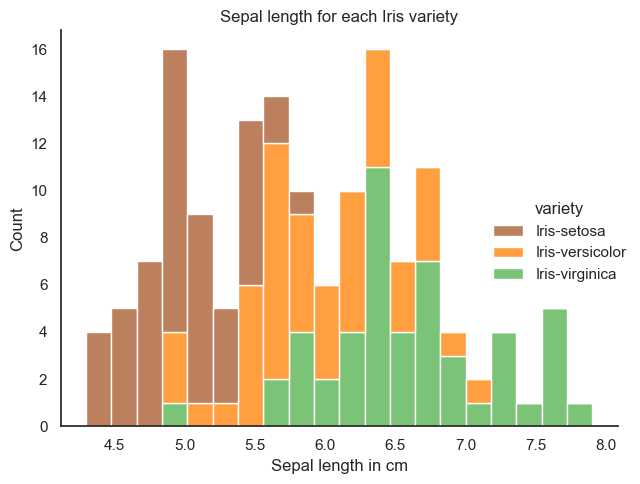

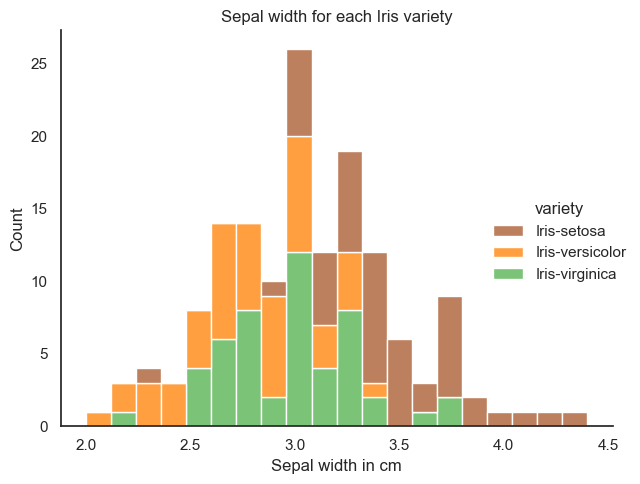

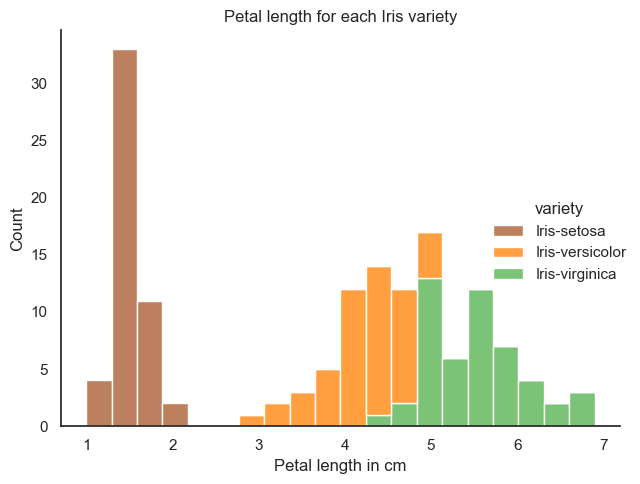

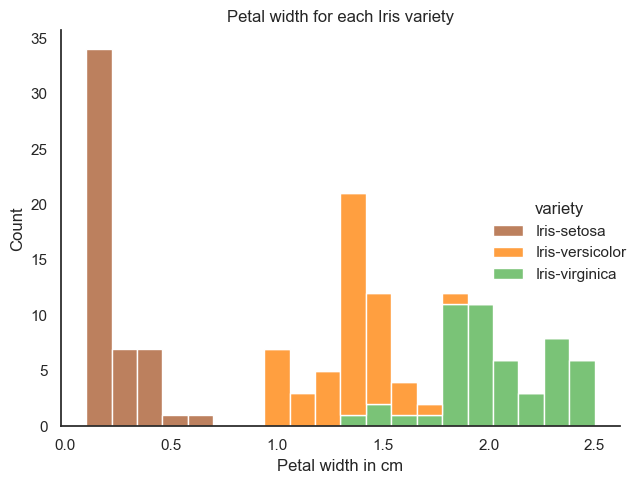

In [203]:
sns.set_theme(style="white")

sepal_length = sns.displot(df, x ="sepal length", bins = 20, hue ="variety", palette = "Set1_r", multiple = "stack").set(title = "Sepal length for each Iris variety", xlabel = "Sepal length in cm")
plt.tight_layout()
plt.savefig('project_images/sepal_length_hist.png')

sepal_width = sns.displot(df, x ="sepal width", bins = 20, hue ="variety", palette = "Set1_r", multiple = "stack").set(title = "Sepal width for each Iris variety", xlabel = "Sepal width in cm")
plt.tight_layout()
plt.savefig('project_images/sepal_width_hist.png')

petal_length = sns.displot(df, x ="petal length", bins = 20, hue ="variety", palette = "Set1_r", multiple = "stack").set(title = "Petal length for each Iris variety", xlabel = "Petal length in cm")
plt.tight_layout()
plt.savefig('project_images/petal_length_hist.png')

petal_width = sns.displot(df, x ="petal width", bins = 20, hue ="variety", palette = "Set1_r", multiple = "stack").set(title = "Petal width for each Iris variety", xlabel = "Petal width in cm")
plt.tight_layout()
plt.savefig('project_images/petal_width_hist.png')

The most obvious visual result from the histograms are the *much* smaller values for petal length and petal width for Iris setosa compared to Iris versicolor and Iris virginica. It is also clear that virginica has larger petals overall compared to versicolor.

In terms of sepal length and sepal width, the ranking of size from smallest to largest measurements (setosa < versicolor < virginica) holds for sepal length, albeit to a less marked degree than for either of the petal characteristics. However, for sepal width, it appears that setosa has the largest measurements overall, with the measurements for versicolor and virginica being noticeably lower, with virginica having slightly higher values for sepal width than versicolor overall.

### Scatterplots ###

To capture the six different trait-pair combinations for each species I used pairplots. Pairplots combine multiple scatterplots into one plot. I modified my plots to enhance their appearance and to make them easier to interpret. 

I used the *corner* argument to removes the top right corner of each pairplot, as the top right corner showed redundant information which I felt cluttered the appearance of the plot and made it harder to interpret. I used the *kind = "reg"* argument in all three of my plots to insert regression lines into each non-diagonal segment. I feel that the bold colours of the plots, regression lines and data points against the white background make it easy to interpret the nature of the relationship between the traits.

I experimented with many different colours for the plots. I needed to pass in separate "keyword arguments" for the diagonal component (*diag_kws = dict(color = )*) and for the plots (*plot_kws = dict(color = )*). I figured out how to modify the colors of the individual plots in this way from watching the following youtube video (especially around 11 mins in): https://www.youtube.com/watch?v=-eyiVTLJuqI.

The diagonal component of each pairplot gives a histogram for each individual trait, but as I was more interested in the comparison of each trait with the other traits, I chose to make the diagonal component grey for each plot. I then choose bold and different colours for the other components of each plot.

I also experimented with different figures for height and aspect and settled on a height of '3' and an aspect of '1', as I felt these dimensions resulted in a desirable size for the plots when I saved them (aspect is the extent to which the horizontal dimension of the plot is multiplied by the given height).

I also added a title using the fig.suptitle() method, and increased the font size of the title.

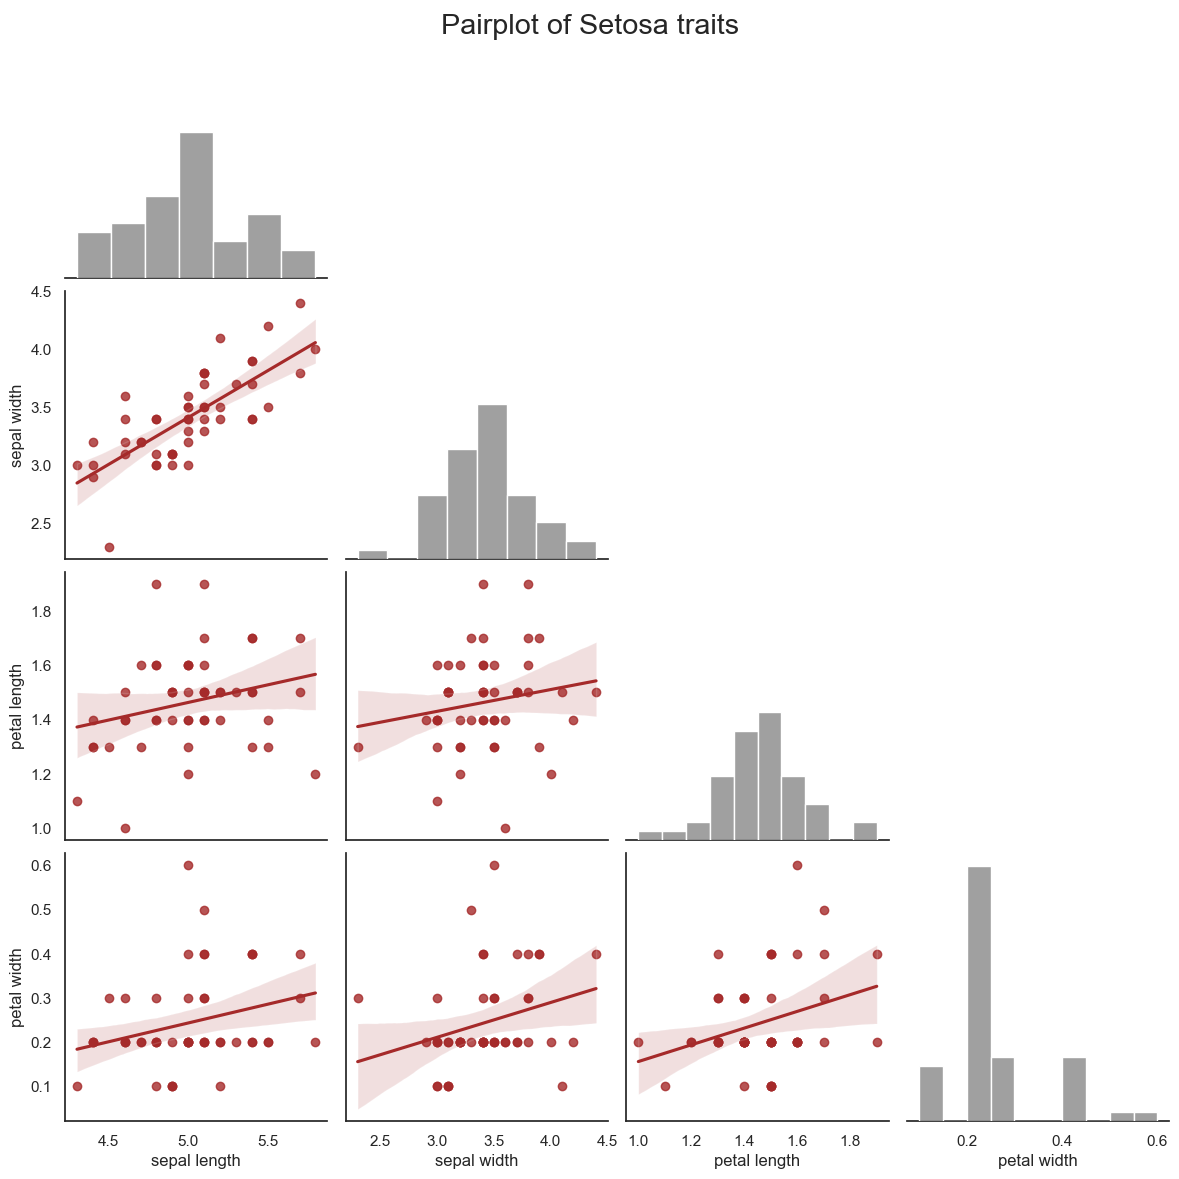

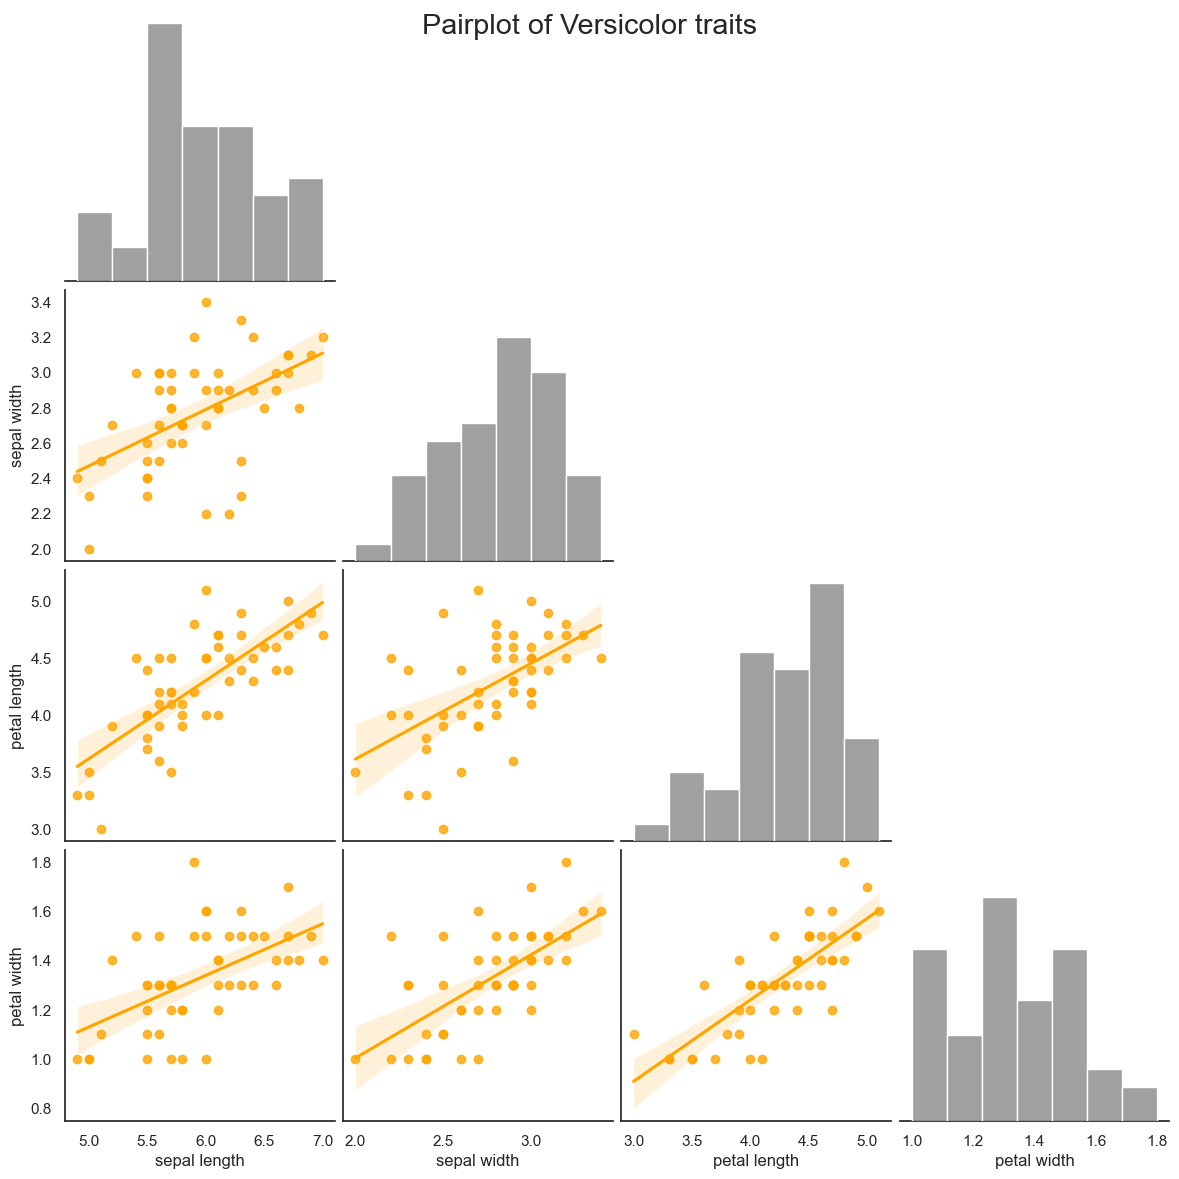

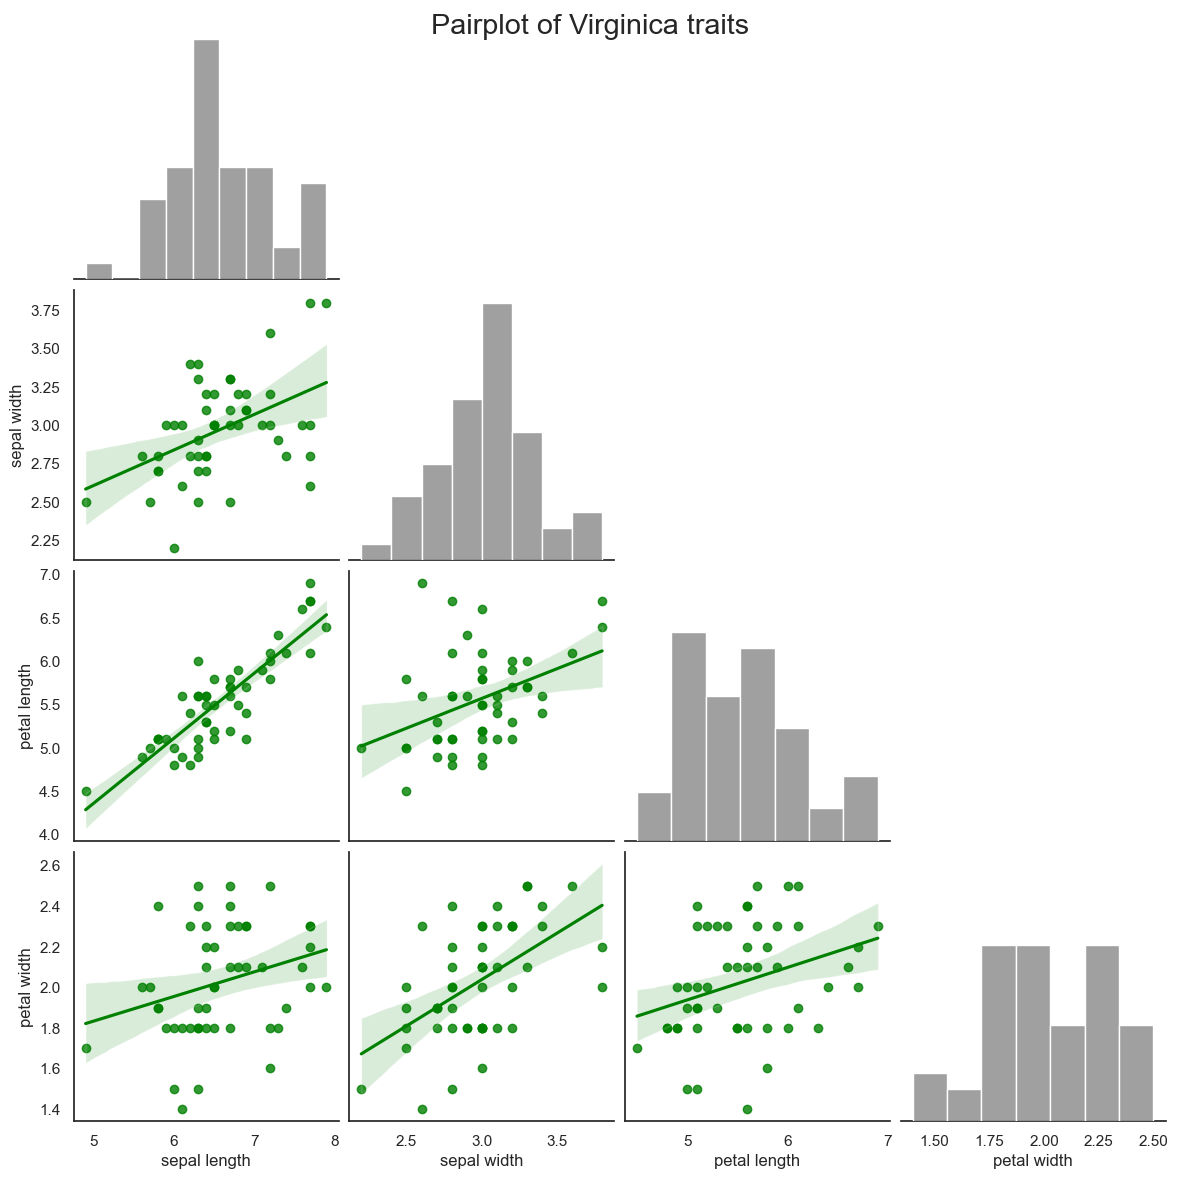

In [204]:
setosa_pairplot = sns.pairplot(df_setosa, diag_kws = dict(color='grey'), plot_kws = dict(color = 'brown'), height=3, aspect=1, corner=True, kind = "reg")
setosa_pairplot.fig.suptitle("Pairplot of Setosa traits", fontsize = "xx-large")
plt.savefig('project_images/setosa_pairplot.png')

versicolor_pairplot = sns.pairplot(df_versicolor, diag_kws=dict(color='grey'), plot_kws=dict(color = 'orange'),  height=3, aspect=1, corner=True, kind = "reg")
versicolor_pairplot.fig.suptitle("Pairplot of Versicolor traits", fontsize = "xx-large")
plt.savefig('project_images/versicolor_pairplot.png')

virginica_pairplot = sns.pairplot(df_virginica, diag_kws=dict(color='grey'), plot_kws=dict(color = 'green'), height=3, aspect=1, corner=True, kind ="reg")
virginica_pairplot.fig.suptitle("Pairplot of Virginica traits", fontsize = "xx-large")
plt.savefig('project_images/virginica_pairplot.png')

Some notes on the pairplots above:

The high degree of correlation between each pair of traits for versicolor is seen clearly, in the form of regression lines close to diagonal across the plot.

The very high degree of correlation between petal length and sepal length stands out greatly in the green plot of virginica.

The weaker correlations between traits for setosa are evident in the more horizontal appearance of the regression lines.

### Boxplots ###

The box and whisker plot (or boxplot) is a method of graphically demonstrating the locality, spread and skewness of numerical data in relation their quartiles. 

- The first, or lower, quartile is the value which 25% of the data points lie beneath.
- The second quartile (or median) is the value which 50% of the data points lie beneath (and 50% above)
- The third, or upper, quartile is the value which 25% of the data points lie above.

The boxplot was developed by John Tukey, who was an American mathematician also known for having coined the term 'bit' for a unit of information.

I will produce a separate plot for each trait, with each plot containing a boxplot for each of the three Iris varieties. I have amended the colour palette to be consistent with the colours I have used for my histograms and scatterplots.

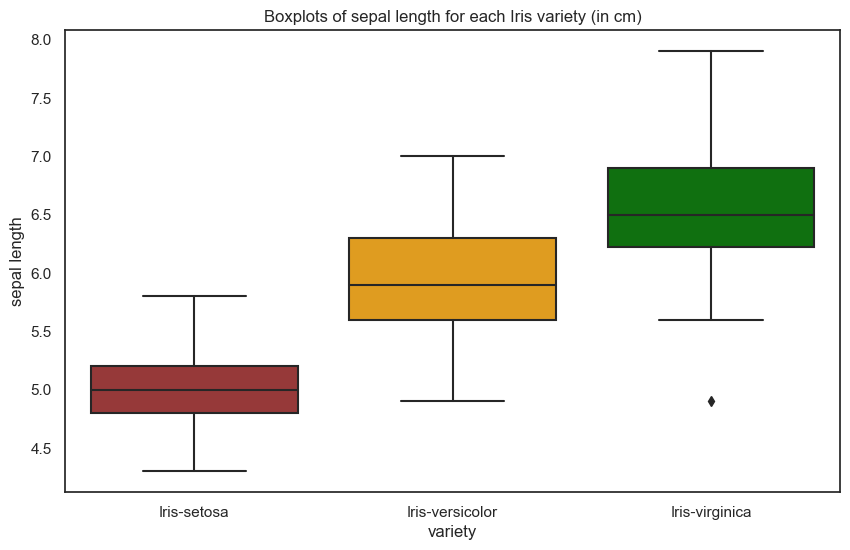

In [205]:
plt.figure(figsize=(10, 6))
plt.title('Boxplots of sepal length for each Iris variety (in cm)')

sns.boxplot(x="variety", y="sepal length", data=df, palette=['brown', 'orange', 'green'])
plt.savefig('project_images/Boxplot_sl.png')
plt.show()

This plot gives us a clear picture of the ranking of each variety with regard to sepal length. 

For each box-plot, the horizontal line (whisker) at the end of each vertical line is the last value which doesn't cross a value of 1.5 times the interquartile range, and the interquartile range is the height of the box (that is, the distance between the 25th percentile value and the 75th percentile value). Any value which lies past either of the two horizontal lines constitutes an outlier.

In this case, we can see the outlier value of 4.9 cm for sepal length in virginica, represented as a black diamond.

Virginica has larger measurements overall for sepal length than versicolor.

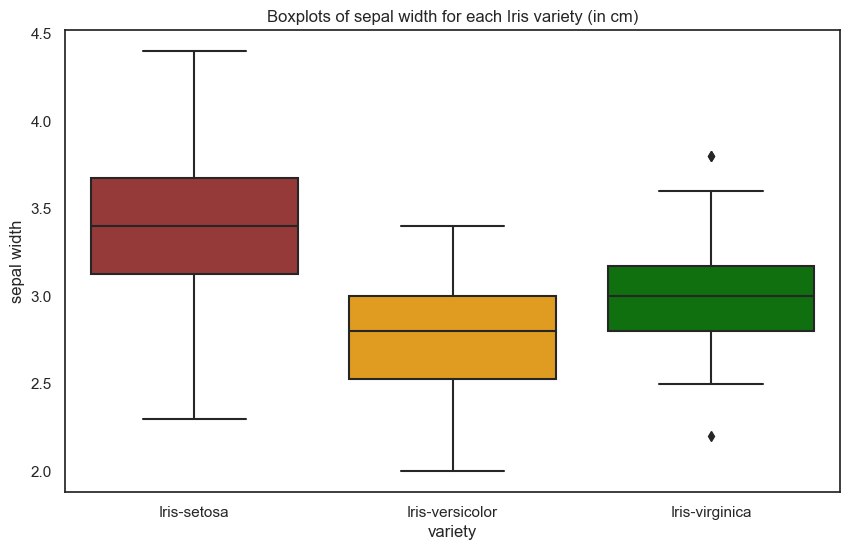

In [206]:
plt.figure(figsize=(10, 6))
plt.title('Boxplots of sepal width for each Iris variety (in cm)')

sns.boxplot(x="variety", y="sepal width", data=df, palette=['brown', 'orange', 'green'])
plt.savefig('project_images/Boxplot_sw.png')
plt.show()

Here we can see that setosa not only has the largest measurements for sepal width overall, but has the broadest *range* of sepal widths also. 

Virginica once again has larger measurements for sepal width than versicolor, but the difference is not as great as it is for sepal length.

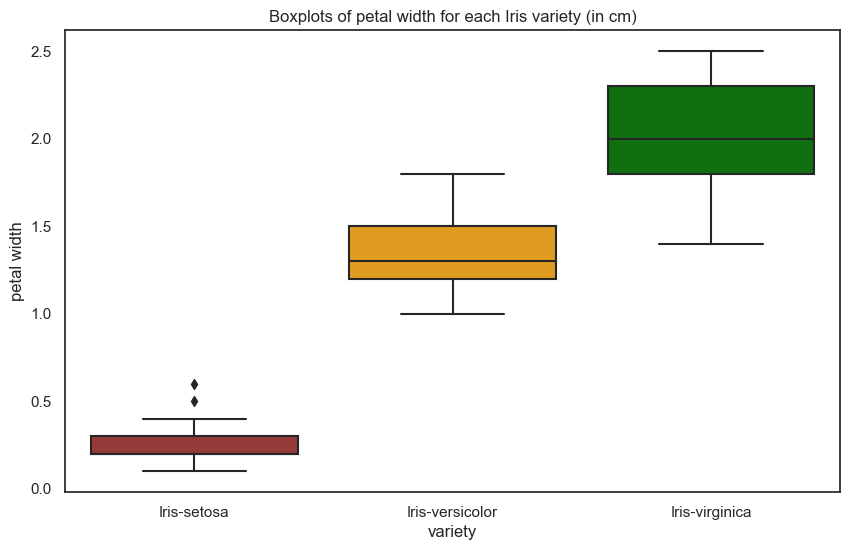

In [207]:
plt.figure(figsize=(10, 6))
plt.title('Boxplots of petal width for each Iris variety (in cm)')

sns.boxplot(x="variety", y="petal width", data=df, palette=['brown', 'orange', 'green'])
plt.savefig('project_images/Boxplot_pw.png')
plt.show()

The boxplots for petal width show that setosa has much smaller measurements than versicolor and virginica. For the the latter two varieties, Virginica once again has larger measurements than versicolor; it also exhibits a much broader range of values.

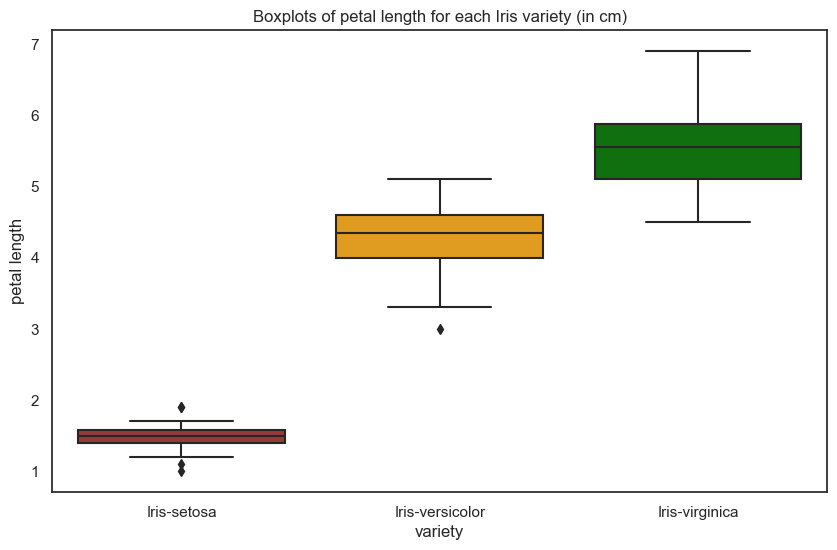

In [208]:
plt.figure(figsize=(10, 6))
plt.title('Boxplots of petal length for each Iris variety (in cm)')

sns.boxplot(x="variety", y="petal length", data=df, palette=['brown', 'orange', 'green'])
plt.savefig('project_images/Boxplot_pl.png')
plt.show()

The boxplots for petal width present a similar picture as those for petal length: setosa has by far the smallest measurements, while virginica has larger measurements than versicolor. 

In general, it seems small petals and large sepal width are traits of setosa. Versicolor and virginica seem to be similarly shaped flowers in terms of the size of their petals relative to their sepals, but virginica has larger petals and sepals on average.

### Linear regression predictions ###

We can use the Scikit Learns LinearRegression class to make predictions as to what the size of one trait for a species will be given what the other trait for the species is. Below I have predicted:
- Setosa petal width based on setosa petal length and 
- Versicolor sepal length based on versicolor sepal width.

However, the code can be modified to predict any one trait of a species based on any other trait for that species.


Prediction of setosa petal width based on petal length (all in cm):

   petal length  petal width
0           1.0     0.156182
1           1.2     0.194035
2           1.4     0.231887
3           1.6     0.269740
4           1.8     0.307592
5           2.0     0.345445
6           2.2     0.383297
7           2.4     0.421150



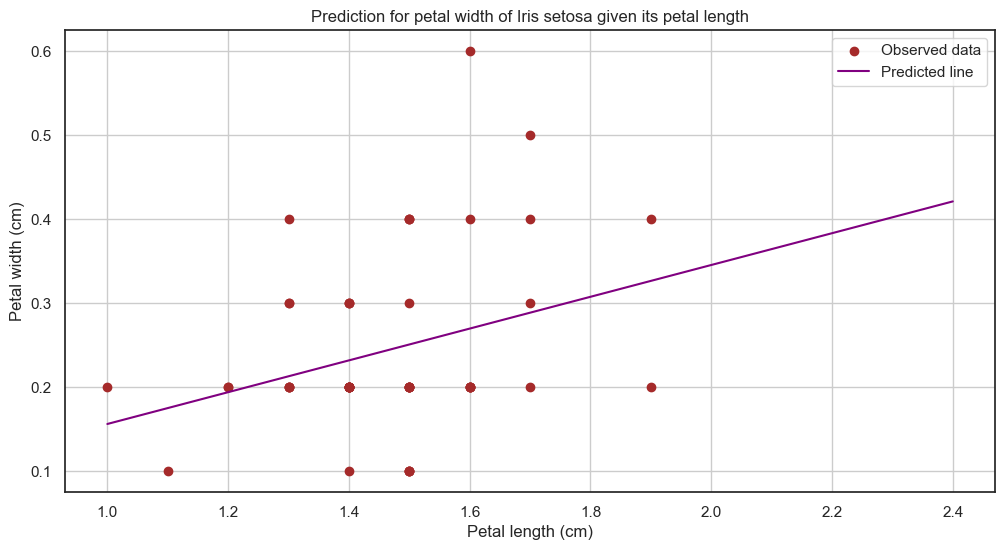

In [209]:
# Here I am reshaping the list of x values as required by Sklearns LinearRegression class
x = df_setosa['petal length'].values.reshape(-1, 1)
y = df_setosa['petal width']

# Here I am creating a linear regression model 'object' and passing in the parameters x and y to fit the model
lr = LinearRegression()
lr.fit(x, y)

# these are the x-values (petal lengths) which will go into the linear-regression model. These should be deciced based 
# what could be considered reasonably possible values for setosa petal length based on existing sample data.
setosa_petal_length_samples = np.array([1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4])

# I am reshaping the above array to enable the linear regression code to process the data
setosa_petal_length_samples_reshaped = setosa_petal_length_samples.reshape(-1, 1)

# these are the y-values (petal width) which will be predicted by the linear regression model
setosa_petal_width_predictions = lr.predict(setosa_petal_length_samples_reshaped)

# I will print the list of predictions for setosa petal width for each of the values for petal length contained in the
# 'setosa_petal_length_samples' array above
df_setosa_petal_width_predictions = pd.DataFrame({'petal length':setosa_petal_length_samples, 'petal width':setosa_petal_width_predictions})
print()
print('Prediction of setosa petal width based on petal length (all in cm):')
print()
print(df_setosa_petal_width_predictions)
print()

plt.figure(figsize= (12,6))
plt.title('Prediction for petal width of Iris setosa given its petal length')
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.scatter(df_setosa['petal length'], df_setosa['petal width'], color = 'brown')
plt.plot(setosa_petal_length_samples_reshaped, setosa_petal_width_predictions, color = 'purple')
plt.legend(["Observed data", "Predicted line"])
plt.grid(True)
plt.savefig('project_images/setosa_petal_width_predictions.png')
plt.show()


Prediction of versicolor sepal length based on sepal width (all in cm):

   sepal width  sepal length
0          1.5      4.837351
1          2.0      5.269890
2          2.5      5.702429
3          3.0      6.134968
4          3.5      6.567507
5          4.0      7.000046
6          4.5      7.432584



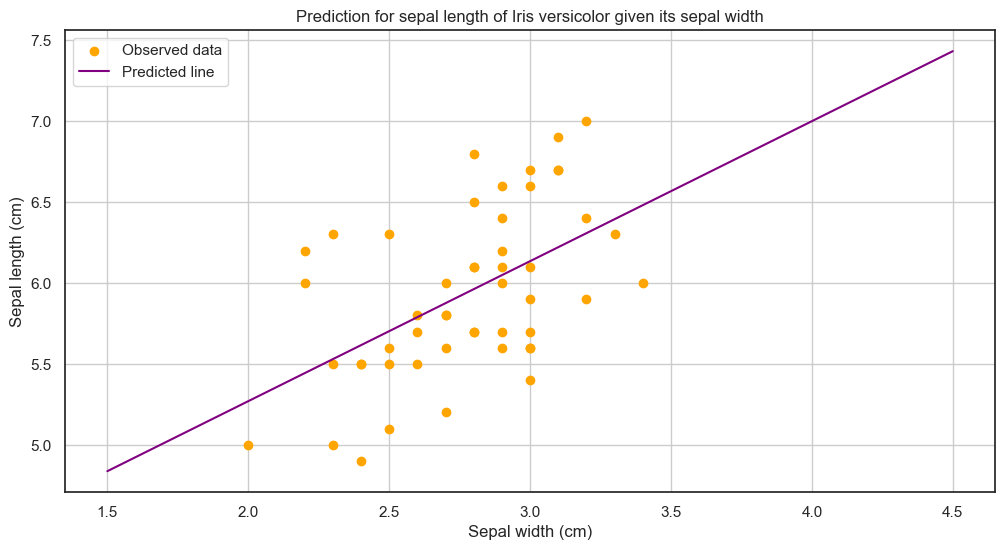

In [210]:
# Here I am reshaping the list of x values as required by Sklearns LinearRegression class
x = df_versicolor['sepal width'].values.reshape(-1, 1)
y = df_versicolor['sepal length']

lr = LinearRegression()
lr.fit(x, y)

# these are the x-values (sepal widths) which will go into the linear-regression model. These should be deciced based 
# what could be considered reasonably possible values for versicolor sepal width based on existing sample data.
versicolor_sepal_width_samples = np.array([1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5])

# I am reshaping the above array to enable the linear regression code to process the data
versicolor_sepal_width_samples_reshaped = versicolor_sepal_width_samples.reshape(-1, 1)

# these are the y-values (petal width) which will be predicted by the linear regression model
versicolor_sepal_length_predictions = lr.predict(versicolor_sepal_width_samples_reshaped)

# I will print the list of predictions for versicolor sepal length for each of the values for sepal width contained in the
# 'versicolor_sepal_width_samples' array above
df_versicolor_sepal_length_predictions = pd.DataFrame({'sepal width':versicolor_sepal_width_samples, 'sepal length':versicolor_sepal_length_predictions})
print()
print('Prediction of versicolor sepal length based on sepal width (all in cm):')
print()
print(df_versicolor_sepal_length_predictions)
print()

plt.figure(figsize= (12,6))
plt.title('Prediction for sepal length of Iris versicolor given its sepal width')
plt.xlabel('Sepal width (cm)')
plt.ylabel('Sepal length (cm)')
plt.scatter(df_versicolor['sepal width'], df_versicolor['sepal length'], color = 'orange')
plt.plot(versicolor_sepal_width_samples_reshaped, versicolor_sepal_length_predictions, color = 'purple')
plt.legend(["Observed data", "Predicted line"])
plt.grid(True)
plt.savefig('project_images/versicolor_sepal_length_predictions.png')
plt.show()

In either case above, we can predict the value of the trait on the y-axis by moving upwards from the value on the x-axis, meeting the predicted line, and moving vertically to the left to see what the predicted value of they-axis is.

### Summary ###

The Iris data set is a nice dataset to test out data analysis techniques using Python. 

It is an intuitively easy dataset to understand, and because so many people have analysed it before, there are many resources available online to help beginners learn how to analyse it for themselves. 

Here, I have used it to test out creating summary statistics, histograms, scatterplots, boxplots and calculating future values based on linear regression. I have also found it useful for testing out the various refinements which can be made to plots etc. to enhance their appeal and impact.

My findings from analysing the data itself were that Iris setosa is distinct from Iris versicolor and Iris virginica, as it is much smaller than the other two. Virginica is also large overall than versicolor, although the difference is much smaller than the difference between these two and setosa. By seperating the overall dataframe by variety and subjecting each variety to the various data analyses, we can easily establish the traits of each variety, how traits to other traits within each variety, and how traits compare between varieties.

### References ###


**Background of dataset:**

1.	(Anderson, E.A (dataset donated by Marshall, M)) 1935. *Iris Data Set*. Archive.ics.uci.edu. Retrieved January 6th 2024, from https://archive.ics.uci.edu/ml/datasets/iris

2.	(Author/s unknown)(n.d). *Iris flower data set*. Wikipedia.org. Retrieved 6th January 2024 from https://en.wikipedia.org/wiki/Iris_flower_data_set.

3.	(Author/s unknown)(n.d). *Edgar Anderson*. Wikipedia.org. Retrieved 6th January 2024 from https://en.wikipedia.org/wiki/Edgar_Anderson 

4.	(Author/s unknown)(n.d). *Petal*. Wikipedia.org. Retrieved 6th January 2024 from https://en.wikipedia.org/wiki/Petal

5.	(Author/s unknown)(n.d). *Sepal*. Wikipedia.org. Retrieved 6th January 2024 from https://en.wikipedia.org/wiki/Sepal 

6.	(Naeem, A) 27th January 2022. *Iris Dataset Classification using Support Vector Machine, Random Forest, and Gradient Boosting Classifier*. embedded-robotics.com. Retrieved January 7th 2024 from https://www.embedded-robotics.com/wp-content/uploads/2022/01/Iris-Dataset-Classification.png (source of Iris photograph).


**Pre-analysis**

7.	(Author/s unknown) 21st January 2023. *Pandas DataFrame loc[] Syntax and Examples*. Sparkbyexamples.com. Retrieved 6th January 2024 from https://sparkbyexamples.com/pandas/pandas-dataframe-loc/  

8.	(Author/s unknown)(n.d). *Introductory*. Matplotlib.org. Retrieved 6th January 2024 from https://matplotlib.org/stable/tutorials/introductory/index.html 

9.	(Author/s unknown)(n.d). *NumPy: the absolute basics for beginners*. Numpy.org. Retrieved 6th January 2024 from https://numpy.org/doc/stable/user/absolute_beginners.html 

10. (Author/s unknown) n.d. *Pandas Tutorial*. W3schools.com. Retrieved 6th January 2024 from https://www.w3schools.com/python/pandas/default.asp 

11. (Author/s unknown) n.d. *seaborn: statistical data visualization*. Retrieved 6th January 2024 from https://seaborn.pydata.org/ 

12. (Author/s unknown) n/d *Scikit-learn*. Wikipedia.org. Retrieved 6th January 2024 from https://en.wikipedia.org/wiki/Scikit-learn

13. (“ankurv343”) 1st August 2020. *Add column names to dataframe in Pandas*. Geeksforgeeks.org. Retrieved 6th January 2024 from https://www.geeksforgeeks.org/add-column-names-to-dataframe-in-pandas/  


**Variable types in dataset**

14. (Author/s unknown) n/d. *pandas.DataFrame.dtypes* pandas.pydata.org. Retrieved 6th January 2024 from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html


**Statistical Analysis**

15. (Author/s unknown) n/d *pandas.DataFrame.describe* Pandas.pydata.org. Retrieved 6th January 2024 from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

16. (Author/s unknown) n.d. *numpy.transpose* Numpy.org. Retrieved 6th January 2024 from https://numpy.org/doc/stable/reference/generated/numpy.transpose.html  

17. (Hayes, A) 16th September 2022. *Co-efficient of Variation Meaning and How to Use It*. Investopedia.com. Retrieved 6th January 2024 from https://www.investopedia.com/terms/c/coefficientofvariation.asp

18. (Author/s unknown) n/d. Wikimedia.org, Retrieved 6th January 2024 from https://upload.wikimedia.org/wikipedia/commons/c/cc/Relationship_between_mean_and_median_under_different_skewness.png (image illustrating skewness)

19. (Chan, K.R) 24th June 2022. *How to test normality, skewness and kurtosis using Python*. Medium.com. Retrieved 6th January 2024 from https://medium.com/omics-diary/how-to-test-normality-skewness-and-kurtosis-using-python-18fb2d8e35b9 (for information about skewness) 

20. (Author/s unknown) (n.d). *Correlation Coefficient*. Wikipedia.org. Retrieved 6th January 2024 from https://en.wikipedia.org/wiki/Correlation_coefficient 

21. (Arnaoot, N) 3rd June 2022. *Iris Statistical Analysis & Predictions*. Retrieved 6th January 2024 from Kaggle.com https://www.kaggle.com/code/narnaoot/iris-statistical-analysis-predictions?scriptVersionId=97348274 (line 16 – code for testing out correlation coefficients). (also: https://www.geeksforgeeks.org/create-a-correlation-matrix-using-python/ for explanation of [0,1])

22. (Bhandari, P) 17th December 2023. *Correlation Coefficient | Types, Formulas & Examples* scribbr.com. Retrieved 7th January from https://www.scribbr.co.uk/stats/correlation-coefficient-meaning/ (image illustrating correlation coefficient and regression lines)

**Data Visualisation**

23. (Author/s unknown) (n.d). *Histogram*. Wikipedia.org. Retrieved 6th January 2024 from https://en.wikipedia.org/wiki/Histogram 

24. (Author/s unknown) (n.d). *Visualizing distributions of data*. Seaborn.pydata.org. Retrieved 6th January 2024 from https://seaborn.pydata.org/tutorial/distributions.html?highlight=histogram#visualizing-distributions-of-data  

25. (Author/s unknown). 8th November 2022. *Seaborn Color Palettes and How to Use Them*. Github.io. Retrieved 6th January 2024 from https://r02b.github.io/seaborn_palettes/ 

26. (Author/s unknown) (n.d). *Tight Layout guide*. Matplotlib.org. Retrieved 6th January 2024 from https://matplotlib.org/stable/tutorials/intermediate/tight_layout_guide.html 

27. (Author/s unknown) (n.d). *seaborn.set_theme*. Seaborn.pydata.org. Retrieved 6th January 2024 from https://seaborn.pydata.org/generated/seaborn.set_theme.html#seaborn.set_theme 

28. (“Zach”) 8th April 2021. *How to Add a Title to Seaborn Plots (With Examples)*. Statology.com. Retrieved 6th January 2024 from https://www.statology.org/seaborn-title/

29. (Author/s unknown) (n.d) *Scatter Plot*. Wikipedia.org. Retrieved 6th January 2024 from https://en.wikipedia.org/wiki/Scatter_plot 

30. (Chen, J) 23rd August 2022. *Line of Best Fit: Definition, How It Works, and Calculation*. Investopedia.org. Retrieved 6th January 2024 from https://www.investopedia.com/terms/l/line-of-best-fit.asp 

31. (Author/s unknown) (n.d). *Seaborn.pairplot*. seaborn.pydata.org. Retrieved 6th January 2024 from https://seaborn.pydata.org/generated/seaborn.pairplot.html 

32. (“Learnerea”) 10th November 2021. *Python Seaborn - 15|What is a Pair Plot and How to Create this Using Seaborn in Python*. Youtube.com. Retrieved 6th January 2024 from https://www.youtube.com/watch?v=-eyiVTLJuqI 

33. (Author/s unknown) (n.d) *Seaborn.regplot*. seaborn.pydata.org. Retrieved 6th January 2024 from https://seaborn.pydata.org/generated/seaborn.regplot.html 

34. (“Zach”) 7th April 2021. *How to Adjust the Figure Size of a Seaborn Plot*. Statology.org. Retrieved 6th January 2024 from https://www.statology.org/seaborn-figure-size/ 

35. (Author/s unknown) (n.d). *matplotlib.pyplot.suptitle*. Matplotlib.org. Retrieved 6th January 2024 from https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.suptitle.html 

36. (Author/s unknown) (n.d) *set_fontsize(fontsize)*. Matplotlib.org. Retrieved 6th January 2024 from https://matplotlib.org/stable/api/text_api.html#matplotlib.text.Text.set_fontsize

37. (Author/s unknown) n/d.*Box-Plot* Wikipedia.org. Retrieved 6th January 2024 from https://en.wikipedia.org/wiki/Box_plot

38. (Author/s unknown) n/d.*John Tukey* Wikipedia.org. Retrieved 6th January 2024 from https://en.wikipedia.org/wiki/John_Tukey

39. (Author/s unknown) n/d.*Quartile* Wikipedia.org. Retrieved 7th January 2024 from https://en.wikipedia.org/wiki/Quartile

40. (author/s unknown) n/d. *seaborn.boxplot* seaborn.pydata.org. Retrieved 7th January 2024 from https://seaborn.pydata.org/generated/seaborn.boxplot.html

41. (McGinley, B – lecturer at ATU) 10th November 2023. *SKLearn – Regression*. vlegalwaymayo.atu. Retrieved 7th January 2024 from https://vlegalwaymayo.atu.ie/course/view.php?id=8876 
